In [1]:
%matplotlib inline

In [2]:
import os, requests, bs4, pandas as pd, copy, json, sqlite3, math
import numpy as np

In [3]:
from bs4 import BeautifulSoup
from haversine import haversine, Unit

In [4]:
from pandas import Series, DataFrame

In [5]:
response = requests.get("https://github.com/tylerharter/cs301-projects/raw/master/fall19/p10/test.py")
response.raise_for_status()
test = response.text
file = open("test.py", "w")
file.write(test) 
file.close()

In [6]:
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    r = requests.get(url)
    r.raise_for_status()
    data = r.text
    f = open(filename, "w", encoding="utf-8")
    f.write(data)
    f.close()
    return (str(filename) + " created!")

In [7]:
download("countries.json","https://raw.githubusercontent.com/tylerharter/caraza-harter-com/master/tyler/cs301/fall19/data/countries.json")

'countries.json already exists!'

In [8]:
download("expected.html", "https://github.com/tylerharter/cs301-projects/raw/master/fall19/p10/expected.html")

'expected.html already exists!'

In [9]:
download("test.py","https://github.com/tylerharter/cs301-projects/raw/master/fall19/p10/test.py")

'test.py already exists!'

In [10]:
countries = pd.read_json("countries.json")

In [12]:
#q1
x = countries['country']
countries_list = []
for i in x:
    if i not in countries_list:
        countries_list.append(i)
    else:
        continue 
    
len(countries_list)

174

In [13]:
#q2 
countries_series = pd.Series(countries["area"].values, index=countries["country"])
countries_series.sum()

127170843

In [179]:
url = "http://techslides.com/list-of-countries-and-capitals"
download('capitals.html', 'https://raw.githubusercontent.com/tylerharter/cs301-projects/master/fall19/p10/techslides-snapshot.html')
r = requests.get(url)
r.raise_for_status()
doc = BeautifulSoup(r.text, "html.parser")
print(doc.prettify())

<!DOCTYPE doctype html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="75966d6efb7a5147e222671bd554749c" name="p:domain_verify">
   <title>
    List of Countries and Capitals | TechSlides
   </title>
   <link href="http://fonts.googleapis.com/css?family=Droid+Serif" rel="stylesheet" type="text/css"/>
   <link href="http://techslides.com/wp-content/themes/minimalist/style.css?ver=3.8.32" id="simple-style-css" media="all" rel="stylesheet" type="text/css">
    <script type="text/javascript">
     var _gaq = _gaq || [];
  _gaq.push(['_setAccount', 'UA-941940-28']);
  _gaq.push(['_trackPageview']);

  (function() {
    var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
    ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';
    var s = document.getElementsByTagName('script')[0]; s.parentNode.insertBefore(ga, s);
  })();
    </script>
    <script async="" src="//pagead2

In [180]:
tables = doc.find_all("table")
assert len(tables) == 1
lst = []
tbl = tables[0]
trs = tbl.find_all("tr")

for tr in trs:
    x = tr.get_text().split("\n")
    countries_dict = {}
    
    if x[1] == "Country Name":
        continue 
    ##make keys    
    countries_dict["country"] = x[1]
    countries_dict["capital"] = x[2]
    countries_dict["latitude"] = float(x[3])
    countries_dict["longitude"] = float(x[4])
    lst.append(countries_dict)
lst

[{'country': 'Afghanistan',
  'capital': 'Kabul',
  'latitude': 34.51666667,
  'longitude': 69.183333},
 {'country': 'Aland Islands',
  'capital': 'Mariehamn',
  'latitude': 60.116667,
  'longitude': 19.9},
 {'country': 'Albania',
  'capital': 'Tirana',
  'latitude': 41.31666667,
  'longitude': 19.816667},
 {'country': 'Algeria',
  'capital': 'Algiers',
  'latitude': 36.75,
  'longitude': 3.05},
 {'country': 'American Samoa',
  'capital': 'Pago Pago',
  'latitude': -14.26666667,
  'longitude': -170.7},
 {'country': 'Andorra',
  'capital': 'Andorra la Vella',
  'latitude': 42.5,
  'longitude': 1.516667},
 {'country': 'Angola',
  'capital': 'Luanda',
  'latitude': -8.833333333,
  'longitude': 13.216667},
 {'country': 'Anguilla',
  'capital': 'The Valley',
  'latitude': 18.21666667,
  'longitude': -63.05},
 {'country': 'Antarctica',
  'capital': 'N/A',
  'latitude': 0.0,
  'longitude': 0.0},
 {'country': 'Antigua and Barbuda',
  'capital': 'Saint John’s',
  'latitude': 17.11666667,
  'lon

In [181]:
lst_ = copy.deepcopy(lst)

for i in lst_:
    if i["country"] not in list(countries.country):
        lst.remove(i)
len(lst)

174

In [182]:
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)
        
write_json("capitals.json", lst)

In [183]:
capitals = pd.read_json("capitals.json")
df = DataFrame(capitals)

In [184]:
#q3
q3 = list(df["country"])
q3

['Afghanistan',
 'Albania',
 'Algeria',
 'Anguilla',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakh

In [185]:
#q4
cuba_cap = df[df["country"] == "Cuba"]
cuba_capital = cuba_cap["capital"]
cuba_itr = iter(cuba_capital)
next(cuba_itr)

'Havana'

In [186]:
#q5
Tbilisi_cap = df[df["capital"] == "Tbilisi"]
Tbilisi_country = Tbilisi_cap["country"]
Tbilisi_iter = iter(Tbilisi_country)
next(Tbilisi_iter)

'Georgia'

In [187]:
#q6
southern = capitals.sort_values(['latitude'])
southern_most = southern[:7]
seven_southern_most = list(southern_most['country'])
seven_southern_most


['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [188]:
#q7 
northern = capitals.sort_values(["latitude"], ascending=False)
northern_most = northern[:5]
five_northern_most = list(northern_most["country"])
five_northern_most

['Iceland', 'Finland', 'Norway', 'Estonia', 'Sweden']

In [189]:
#q8
countries.loc[:,"birth-date":"death-rate":2].describe()

,birth-rate,death-rate
count,174.000000,174.000000
mean,22.463851,9.625172
std,11.278992,5.187143
min,8.250000,2.410000
25%,12.597500,6.027500
50%,20.010000,8.230000
75%,29.860000,11.715000
max,50.730000,29.740000


In [190]:
countries["literacy"] = countries["literacy"].str.replace(",",".").astype(float)
countries["phones"] = countries["phones"].str.replace(",",".").astype(float)

In [191]:
#q9
countries.loc[:,"literacy":"phones":2].describe()

,literacy,phones
count,174.000000,174.000000
mean,82.362069,215.770690
std,20.003166,218.713811
min,17.600000,1.300000
25%,70.100000,32.000000
50%,92.100000,140.350000
75%,98.000000,331.750000
max,100.000000,1035.600000


In [192]:
#q10 
landlock = countries.sort_values(['coastline'])
landlocked = landlock.loc[landlock['coastline']==0]
landlockeuro = landlocked.loc[landlocked['continent']=='Europe']
largest = landlockeuro.sort_values(['area'])
largest[-1:]
largest_country = list(largest['country']).pop()
largest_country

'Belarus'

In [193]:
#q11 
landlock = countries.sort_values(['coastline'])
landlocked = landlock.loc[landlock['coastline']==0]
landlockasia = landlocked.loc[landlocked['continent']=='Asia']
largest = landlockasia.sort_values(['area'])
largest[-1:]
largest_country = list(largest['country']).pop()
largest_country

'Kazakhstan'

In [194]:
#q12
landlock = countries.sort_values(['coastline'])
landlocked = landlock.loc[landlock['coastline']==0]
landlockasia = landlocked.loc[landlocked['continent']=='Asia']
largest = landlockasia.sort_values(['population'])
largest[-1:]
largest_pop = list(largest['country']).pop()
largest_pop

'Afghanistan'

In [195]:
#q13 
#source https://pypi.org/project/haversine/
randall = (43.070231, -89.411893)
capital = (43.074645, -89.384113) 
haversine(randall, capital, unit=Unit.MILES)

1.4349003699749172

In [196]:
France = capitals.loc[capitals['country']=='France']
F_lat = France["latitude"]
F_lat_itr = next(iter(F_lat))
F_lat_itr
F_lon = France["longitude"]
F_lon_itr = next(iter(F_lon))
F_lon_itr

2.333333

In [197]:
Japan = capitals.loc[capitals['country']=='Japan']
J_lat = Japan["latitude"]
J_lat_itr = next(iter(J_lat))
J_lat_itr
J_lon = Japan["longitude"]
J_lon_itr = next(iter(J_lon))
J_lon_itr

139.75

In [198]:
#q14
Japan = (J_lat_itr, J_lon_itr)
France = (F_lat_itr, F_lon_itr)
haversine(France, Japan, unit=Unit.MILES)

6036.541566903148

In [199]:
#code copied from https://gist.github.com/rochacbruno/2883505
def distance(lat1, lon1, lat2, lon2):
    r = 3956 #given 
    dlon = math.radians(lon2-lon1)
    dlat = math.radians(lat2-lat1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
     * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    final_distance = r * c

    return final_distance

In [200]:
#q15
count_guam = capitals.loc[capitals['country']=='Guam']
count_guam_list = list(count_guam['country']).pop()

count_new_zealand = capitals.loc[capitals['country']=='New Zealand']
count_new_zealand_list = list(count_new_zealand['country']).pop()

count_australia = capitals.loc[capitals['country']=='Australia']
count_australia_list = list(count_australia['country']).pop()

indices = columns = [count_guam_list, count_new_zealand_list, count_australia_list]
df = DataFrame(index = indices, columns = columns)

lat1 = list(count_guam['latitude']).pop()
lon1 = list(count_guam['longitude']).pop()

lat2 = list(count_new_zealand['latitude']).pop()
lon2 = list(count_new_zealand['longitude']).pop()

lat3 = list(count_australia['latitude']).pop()
lon3 = list(count_australia['longitude']).pop()

df[count_guam_list][count_new_zealand_list] = df[count_new_zealand_list][count_guam_list] = distance(lat1, lon1, lat2, lon2)
df[count_guam_list][count_australia_list] = df[count_australia_list][count_guam_list] = distance(lat1, lon1, lat3, lon3)
df[count_australia_list][count_new_zealand_list] = df[count_new_zealand_list][count_australia_list] = distance(lat2, lon2, lat3, lon3)
df

,Guam,New Zealand,Australia
Guam,NaN,4239.31,3377.1
New Zealand,4239.31,NaN,1445.15
Australia,3377.1,1445.15,NaN


In [201]:
#q16
i1 = countries.sort_values(by=['country'])
j1 = capitals.sort_values(by=['country'])
conts = i1.set_index(['country'])
lats = j1.set_index(['country'])
table1 = {'latitude':lats['latitude'], 'longitude':lats['longitude'], 'continent':conts['continent'],}

df_4 = DataFrame(table1)
df_5 = df_4[df_4['continent'] == 'Australia']

table2 = {'latitude':df_5['latitude'], 'longitude':df_5['longitude'], 'country':df_5.index.values,'index':(range(len(df_5['latitude'].tolist())))}
df_6 = DataFrame(table2)
df_6 = df_6.set_index('index')

latlist = (df_6['latitude'].tolist())
longlist = (df_6['longitude'].tolist())
countrylist = (df_6['country'].tolist())


count = 0
count2 = 0
ans = 0
row = []
values = {}
while count < 12:
    while count2 < 12: 
        ans = distance(latlist[count], longlist[count], latlist[count2], longlist[count2])
        if ans == 0.0:
            values[countrylist[count2]] = np.nan
        if ans != 0.0:
            values[countrylist[count2]] = ans
        count2 += 1
    row.append(values)
    values = {}
    count += 1
    count2 = 0
df_7 = DataFrame(row)
df_8 = df_7.set_index(Series(countrylist))
df_8

,Australia,Fiji,French Polynesia,Guam,Marshall Islands,New Caledonia,New Zealand,Palau,Papua New Guinea,Samoa,Tonga,Vanuatu
Australia,NaN,2145.768971,3920.570216,3377.103870,3263.901948,1375.924712,1445.147895,3099.023227,1786.749660,2840.091065,2362.766922,1687.810709
Fiji,2145.768971,NaN,2102.135722,3165.570014,1806.972599,825.890876,1613.916992,3468.037102,2174.712829,716.316054,463.843872,663.967196
French Polynesia,3920.570216,2102.135722,NaN,4961.131713,3159.856137,2864.497308,2668.807328,5447.018761,4265.757856,1496.953816,1686.539411,2765.339382
Guam,3377.103870,3165.570014,4961.131713,NaN,1861.584428,2871.868601,4239.314912,800.243081,1591.171595,3520.883355,3617.512808,2687.395771
Marshall Islands,3263.901948,1806.972599,3159.856137,1861.584428,NaN,2054.905160,3348.725378,2516.301728,2019.144119,1849.150692,2151.129410,1727.328621
New Caledonia,1375.924712,825.890876,2864.497308,2871.868601,2054.905160,NaN,1400.483623,2974.892838,1552.708901,1542.152644,1179.069567,335.602971
New Zealand,1445.147895,1613.916992,2668.807328,4239.314912,3348.725378,1400.483623,NaN,4218.188412,2767.607095,2062.548020,1510.219450,1671.641167
Palau,3099.023227,3468.037102,5447.018761,800.243081,2516.301728,2974.892838,4218.188412,NaN,1453.306058,3956.305436,3931.843110,2882.041892
Papua New Guinea,1786.749660,2174.712829,4265.757856,1591.171595,2019.144119,1552.708901,2767.607095,1453.306058,NaN,2789.123270,2623.742354,1527.495923
Samoa,2840.091065,716.316054,1496.953816,3520.883355,1849.150692,1542.152644,2062.548020,3956.305436,2789.123270,NaN,553.393188,1349.904435


In [202]:
#q17
df_8['mean'] = df_8.mean(axis=1)
mean_distance = df_8['mean']

sorted_mean = mean_distance.sort_values(ascending = True)
listed_means = sorted_mean.index

listed_means[0]

'Vanuatu'

In [203]:
#q18
listed_means[11]

'French Polynesia'

In [204]:
#q19
closest_dist = df_8.min()
closest_to = df_8.idxmin()
table_5 = {'nearest':closest_to, 'distance':closest_dist}
df_9 = DataFrame(table_5)
df_9

,nearest,distance
Australia,New Caledonia,1375.924712
Fiji,Tonga,463.843872
French Polynesia,Samoa,1496.953816
Guam,Palau,800.243081
Marshall Islands,Vanuatu,1727.328621
New Caledonia,Vanuatu,335.602971
New Zealand,New Caledonia,1400.483623
Palau,Guam,800.243081
Papua New Guinea,Palau,1453.306058
Samoa,Tonga,553.393188


In [205]:
#q20
furthest_dist = df_8.max()
furthest_to = df_8.idxmax()
table_6 = {'furthest':furthest_to, 'distance':furthest_dist}
df_10 = DataFrame(table_6)
df_10

,furthest,distance
Australia,French Polynesia,3920.570216
Fiji,Palau,3468.037102
French Polynesia,Palau,5447.018761
Guam,French Polynesia,4961.131713
Marshall Islands,New Zealand,3348.725378
New Caledonia,Palau,2974.892838
New Zealand,Guam,4239.314912
Palau,French Polynesia,5447.018761
Papua New Guinea,French Polynesia,4265.757856
Samoa,Palau,3956.305436


In [206]:
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

In [207]:
def qry(sql, cap= 174):
    return pd.read_sql(sql, conn).head(cap)

In [208]:
#q21
df = qry("""
SELECT continent, COUNT(country) as 'number of countries'
FROM countries
GROUP BY continent
ORDER BY COUNT(country) ASC
""")
df

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


In [209]:
ccbar_df = df.set_index("continent")
ccbar_df.head()

,number of countries
continent,
Australia,12
South America,12
North America,24
Asia,38
Europe,41


In [210]:
ccbar = ccbar_df["number of countries"]
ccbar

continent
Australia        12
South America    12
North America    24
Asia             38
Europe           41
Africa           47
Name: number of countries, dtype: int64

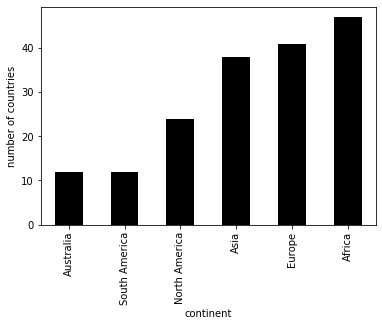

In [211]:
#q22
gg = ccbar.plot.bar(x='continent', color="black")
gg.set_ylabel("number of countries")
None

In [212]:
#q23
df = qry("""
SELECT continent, SUM(population)/1000000.0 as 'total population (million)'
FROM countries
GROUP BY continent
ORDER BY SUM(population)/1000000.0 DESC
""")
df

,continent,total population (million)
0,Asia,3739.902863
1,Africa,807.299195
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


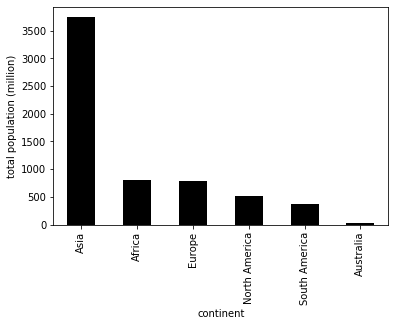

In [213]:
#q24
pop_df = df.set_index("continent")
pop_df
pop = pop_df["total population (million)"]
pop
hh = pop.plot.bar(color="black")
hh.set_ylabel("total population (million)")
None

In [214]:
#q25
df = qry("""
SELECT country, population
FROM countries
WHERE continent = "South America"
ORDER BY population DESC
""")
df

,country,population
0,Brazil,188078227
1,Colombia,43593035
2,Argentina,39921833
3,Peru,28302603
4,Venezuela,25730435
5,Chile,16134219
6,Ecuador,13547510
7,Bolivia,8989046
8,Paraguay,6506464
9,Uruguay,3431932


In [230]:
#q26
df = qry("""
SELECT country, (population*`gdp-per-capita`)/1000000000.0 as 'real GDP (billion)'
FROM countries
ORDER BY (population*`gdp-per-capita`) DESC
LIMIT 10
""")
df

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


In [236]:
df_all = qry("""
SELECT country, (population*`gdp-per-capita`)/1000000000.0 as 'real GDP (billion)'
FROM countries
ORDER BY (population*`gdp-per-capita`) DESC
""")
df_all
df_set = df_all.set_index("country")
other_sum = df_set[10:].sum()
summed = other_sum["real GDP (billion)"]

In [238]:
gdp_df = df.set_index("country")
gdp_df

other_df = df.set_index("country")
other_df

# other = other_df["real GDP (billion)"]
# other

gdp = gdp_df["real GDP (billion)"]
gdp

# other_gdp = other[0:].sum()
# other_gdp

top10 = gdp[0:]
top10['other'] = summed

top10


country
United States     11281.191327
China              6569.868565
Japan              3594.473830
India              3176.520785
Germany            2274.855452
France             1680.181354
United Kingdom     1678.873538
Italy              1552.164690
Brazil             1429.394525
Russia             1271.752506
other             16695.458656
Name: real GDP (billion), dtype: float64

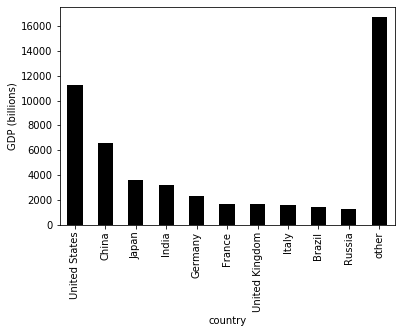

In [239]:
#q27
jj = top10.plot.bar(color="black")
jj.set_ylabel("GDP (billions)")
None

In [240]:
#q28
df = qry("""
SELECT country, `death-rate`, `birth-rate`
FROM countries
ORDER BY (`birth-rate`-`death-rate`) DESC
LIMIT 15
""")
df

,country,death-rate,birth-rate
0,Uganda,12.24,47.35
1,Yemen,8.30,42.89
2,Mali,16.89,49.82
3,Oman,3.81,36.24
4,Madagascar,11.11,41.41
5,Burkina Faso,15.60,45.62
6,Niger,20.91,50.73
7,Chad,16.38,45.73
8,Mauritania,12.16,40.99
9,Burundi,13.46,42.22


In [241]:
df = qry("""
SELECT country, `death-rate`, `birth-rate`
FROM countries
ORDER BY (`birth-rate`-`death-rate`) DESC
LIMIT 15
""")
df
death_df = df.set_index("country")
death_df

,death-rate,birth-rate
country,,
Uganda,12.24,47.35
Yemen,8.30,42.89
Mali,16.89,49.82
Oman,3.81,36.24
Madagascar,11.11,41.41
Burkina Faso,15.60,45.62
Niger,20.91,50.73
Chad,16.38,45.73
Mauritania,12.16,40.99


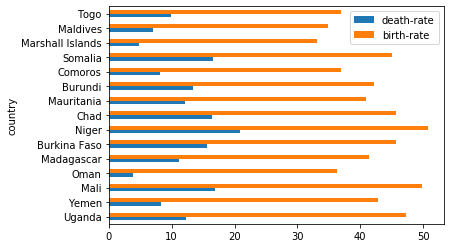

In [242]:
#q29
death_df.plot.barh()
None

In [243]:
df = qry("""
SELECT country, `death-rate`, `birth-rate`
FROM countries
ORDER BY (`birth-rate`-`death-rate`) DESC
""")
df

,country,death-rate,birth-rate
0,Uganda,12.24,47.35
1,Yemen,8.30,42.89
2,Mali,16.89,49.82
3,Oman,3.81,36.24
4,Madagascar,11.11,41.41
...,...,...,...
169,Latvia,13.66,9.24
170,Bulgaria,14.27,9.65
171,Russia,14.65,9.95
172,Ukraine,14.39,8.82


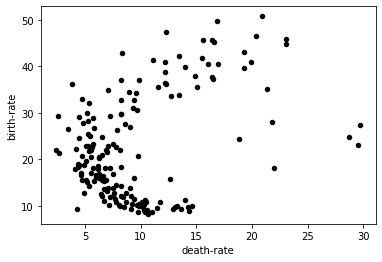

In [244]:
#q30
deathscat_df = df.set_index("country")
deathscat_df.plot.scatter(x="death-rate", y="birth-rate",c="black")
None

In [14]:
#q31
death_cat = deathscat_df.reset_index(drop=False)
df1 = death_cat.loc[death_cat['death-rate'] >= 17]
df2 = df1.loc[df1['birth-rate'] <=30]
df3 = df2.sort_values(['death-rate'], ascending = True)
df4 = df3.reset_index(drop=True)
df4

NameError: name 'deathscat_df' is not defined

In [246]:
#q32
deathscat_df.corr()
corr = deathscat_df.corr()
corr_iter = iter(corr["birth-rate"])
ans = next(corr_iter)
ans

0.39650861177525115

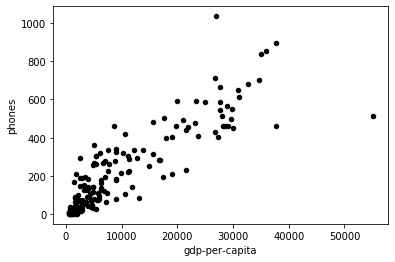

In [247]:
#q33 
df = qry("""
SELECT country, `gdp-per-capita`, `phones`
FROM countries
""")
df
phones_df = df.set_index("country")
phones_df
phones_df.plot.scatter(x="gdp-per-capita",y="phones",c="black")
None

In [248]:
phones_df.corr()

,gdp-per-capita,phones
gdp-per-capita,1.000000,0.878695
phones,0.878695,1.000000


In [249]:
#q34
corr = phones_df.corr()
corr_iter = iter(corr["phones"])
ans = next(corr_iter)
ans


0.8786946640591311

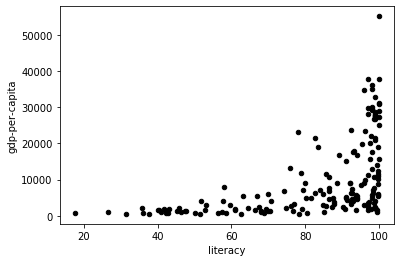

In [250]:
#q35
df = qry("""
SELECT country, `gdp-per-capita`, `literacy`
FROM countries
""")
lit_df = df.set_index("country")
lit_df
lit_df.plot.scatter(x="literacy", y="gdp-per-capita", c="black")
None

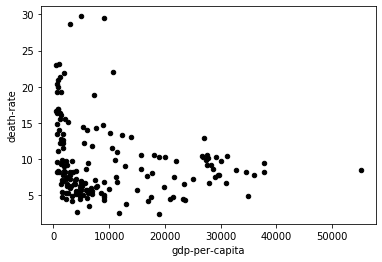

In [251]:
#q36
df = qry("""
SELECT country, `gdp-per-capita`, `death-rate`
FROM countries
""")
death_df = df.set_index("country")
death_df
death_df.plot.scatter(x="gdp-per-capita", y="death-rate", c="black")
None

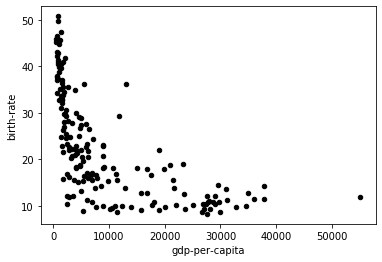

In [252]:
#q37 
df = qry("""
SELECT country, `gdp-per-capita`, `birth-rate`
FROM countries
""")
birth_df = df.set_index("country")
birth_df

birth_df.plot.scatter(x="gdp-per-capita", y="birth-rate", c="black")
None

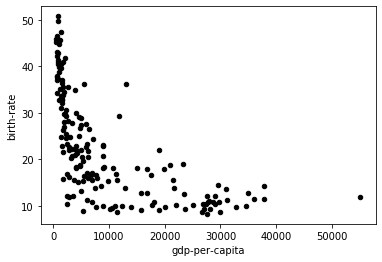

In [253]:
#q37 
df = qry("""
SELECT country, `gdp-per-capita`, `birth-rate`
FROM countries
""")
birth_df = df.set_index("country")
birth_df
birth_df.plot.scatter(x="gdp-per-capita", y="birth-rate", c="black")
None

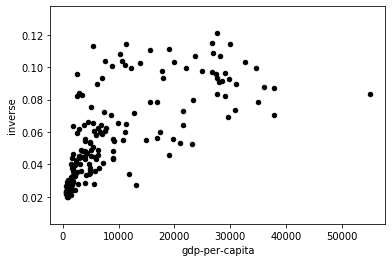

In [254]:
#q38 
df = qry("""
SELECT country, `gdp-per-capita`, (1 / `birth-rate`) as 'inverse'
FROM countries
""")
inverse_df = df.set_index("country")
inverse_df 
inverse_df.plot.scatter(x="gdp-per-capita", y = "inverse", c="black")
None

In [255]:
#q39
df["1"] = 1
res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse"], rcond=None)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
m,n


(1.8365703926233426e-06, 0.03916624252079352)

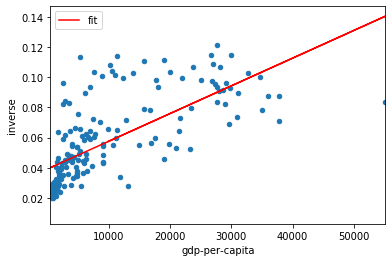

In [256]:
#q40 
ax = df.plot.scatter(x='gdp-per-capita', y='inverse')
df["fit"] = df["gdp-per-capita"] * m + n
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)
None